In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

In [2]:
per_clf = Perceptron(random_state = 42)
per_clf.fit(X, y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


In [3]:
X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new)
y_pred

# SImple Perceptron with binary labels

array([ True, False])

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state = 42)

In [5]:
mlp_reg = MLPRegressor(hidden_layer_sizes = [50,50,50], early_stopping = True, verbose = True, random_state = 42)

# Multi Layer Perceptron with 3 hidden layers with 50 neurons each constrcuting a feed forward neural network
# Automatically default to early stopping if it has no improvement over 10 epoch

In [6]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.85190332
Validation score: 0.534299
Iteration 2, loss = 0.28288639
Validation score: 0.651094
Iteration 3, loss = 0.22884372
Validation score: 0.699782
Iteration 4, loss = 0.20746145
Validation score: 0.720468
Iteration 5, loss = 0.19649383
Validation score: 0.724839
Iteration 6, loss = 0.18928708
Validation score: 0.740084
Iteration 7, loss = 0.18132029
Validation score: 0.747406
Iteration 8, loss = 0.17556450
Validation score: 0.753945
Iteration 9, loss = 0.17190651
Validation score: 0.760500
Iteration 10, loss = 0.16687650
Validation score: 0.759213
Iteration 11, loss = 0.16329479
Validation score: 0.761907
Iteration 12, loss = 0.16054473
Validation score: 0.768950
Iteration 13, loss = 0.15690181
Validation score: 0.762699
Iteration 14, loss = 0.15630644
Validation score: 0.766003
Iteration 15, loss = 0.15712517
Validation score: 0.778464
Iteration 16, loss = 0.15155981
Validation score: 0.774237
Iteration 17, loss = 0.14957641
Validation score: 0.778361
Iterat

,steps,"[('standardscaler', ...), ('mlpregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'


In [7]:
mlp_reg.best_validation_score_

0.791536125425778

In [8]:
y_pred = pipeline.predict(X_test)

In [9]:
rmse = root_mean_squared_error(y_test, y_pred)

In [10]:
rmse

0.5327699946812925

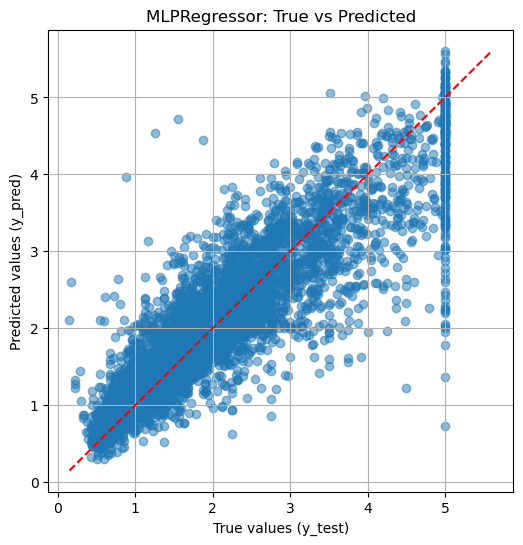

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("MLPRegressor: True vs Predicted")

lims = [
    np.min([y_test.min(), y_pred.min()]),
    np.max([y_test.max(), y_pred.max()])
]
plt.plot(lims, lims, "r--")
plt.grid(True)
plt.show()

In [12]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(name = "Fashion-MNIST", as_frame = False)
targets = fashion_mnist.target.astype(int)

In [13]:
X_train, y_train = fashion_mnist.data[:60_000], targets[:60_000]
X_test, y_test = fashion_mnist.data[60_000:], targets[60_000:]

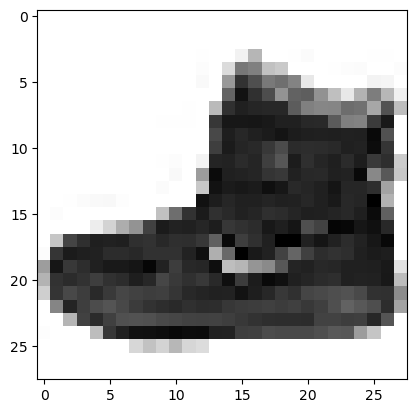

In [14]:
X_sample = X_train[0].reshape(28, 28)
plt.imshow(X_sample, cmap = 'binary')
plt.show()

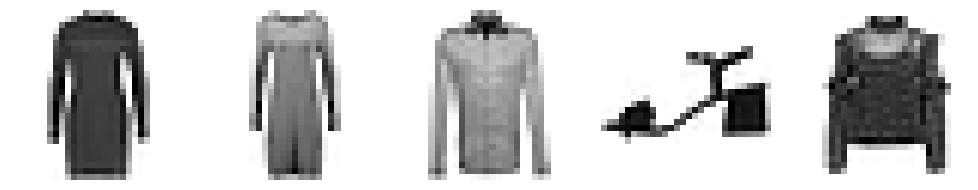

In [15]:
idx = np.random.choice(len(X_train), size=5, replace=False)

plt.figure(figsize=(10, 2))
for i, k in enumerate(idx):
    X_sample = X_train[k].reshape(28, 28)
    plt.subplot(1, 5, i+1)
    plt.imshow(X_sample, cmap='binary')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
"Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



In [17]:
class_names[y_train[0]]

'Ankle boot'

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

mlp_clf = MLPClassifier(hidden_layer_sizes = [300, 100], verbose = True,
                      early_stopping = True, random_state = 42)  # 2 hidden layers with 300 neurons and 100 neurons

pipeline = make_pipeline(MinMaxScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)

Iteration 1, loss = 0.55394420
Validation score: 0.854833
Iteration 2, loss = 0.39017365
Validation score: 0.867500
Iteration 3, loss = 0.34572472
Validation score: 0.877500
Iteration 4, loss = 0.31541926
Validation score: 0.881167
Iteration 5, loss = 0.29351007
Validation score: 0.887167
Iteration 6, loss = 0.28459028
Validation score: 0.889167
Iteration 7, loss = 0.26775210
Validation score: 0.885500
Iteration 8, loss = 0.25610516
Validation score: 0.886667
Iteration 9, loss = 0.24488907
Validation score: 0.893167
Iteration 10, loss = 0.23915583
Validation score: 0.888500
Iteration 11, loss = 0.22290961
Validation score: 0.897167
Iteration 12, loss = 0.21925185
Validation score: 0.889667
Iteration 13, loss = 0.21249406
Validation score: 0.892167
Iteration 14, loss = 0.20374069
Validation score: 0.891333
Iteration 15, loss = 0.19557455
Validation score: 0.893833
Iteration 16, loss = 0.19099949
Validation score: 0.893667
Iteration 17, loss = 0.18445775
Validation score: 0.890333
Iterat

In [19]:
X_new = X_test[:15]
mlp_clf.predict(X_new)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4])

In [20]:
import numpy as np

y_pred = pipeline.predict(X_new) 
pred_names = [class_names[i] for i in y_pred]
print(pred_names)

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal', 'Dress', 'Coat']


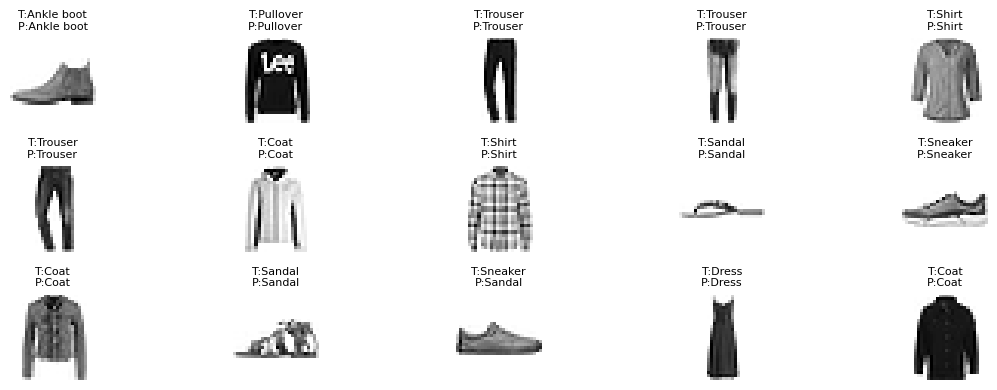

In [21]:
X_new_images = X_new.reshape(-1, 28, 28)
y_true = y_test[:15]

plt.figure(figsize=(12, 4))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_new_images[i], cmap="binary")
    plt.axis("off")
    true_name = class_names[y_true[i]]
    pred_name = class_names[y_pred[i]]
    plt.title(f"T:{true_name}\nP:{pred_name}", fontsize=8)
plt.tight_layout()
plt.show()

In [22]:
y_proba = mlp_clf.predict_proba(X_new)
y_proba[12]

# The 12th image was misclassified
# it has 100% confident in its prediction which is overconfident for a wrong classification due to long training

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])